In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

stock = 'GOOG'

df = yf.download(stock, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-10-05,12.145725,12.264779,12.038377,12.167394,12.137586,86105539
2009-10-06,12.246597,12.437631,12.246597,12.421940,12.391508,109701653
2009-10-07,12.428415,12.926299,12.398776,12.890184,12.858606,195698788
2009-10-08,12.940745,13.032401,12.785577,12.806498,12.775124,172797268
2009-10-09,12.868018,12.989064,12.814468,12.858055,12.826555,109934523
...,...,...,...,...,...,...
2024-09-26,165.029999,165.500000,163.500000,163.830002,163.830002,18234500
2024-09-27,163.910004,166.970001,163.830002,165.289993,165.289993,13604300
2024-09-30,164.779999,167.360001,164.639999,167.190002,167.190002,14070100


In [4]:
df.shape

(3774, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-10-05 to 2024-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3774 non-null   float64
 1   High       3774 non-null   float64
 2   Low        3774 non-null   float64
 3   Close      3774 non-null   float64
 4   Adj Close  3774 non-null   float64
 5   Volume     3774 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.4 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,58.731405,59.341861,58.158211,58.760362,58.621538,5.448361e+07
std,45.315250,45.827875,44.857847,45.342768,45.244251,4.932806e+07
min,10.916831,11.015710,10.800268,10.861040,10.834433,1.584340e+05
25%,21.844745,21.944995,21.711931,21.843562,21.790050,2.443822e+07
50%,41.787750,42.098749,41.562750,41.849751,41.747229,3.437100e+07
75%,88.261248,89.243126,87.314312,88.316999,88.100645,7.354215e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,5.952147e+08


In [7]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

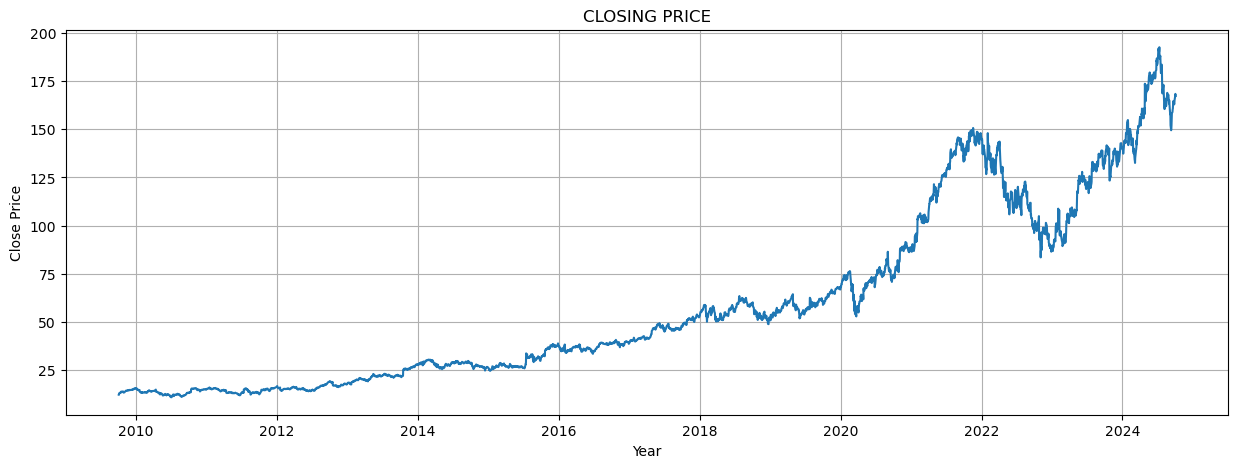

In [8]:
plt.figure(figsize = (15,5))
plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.title("CLOSING PRICE")
plt.grid(True)
plt.show()

In [9]:
ma100 = df.Close.rolling(100).mean()


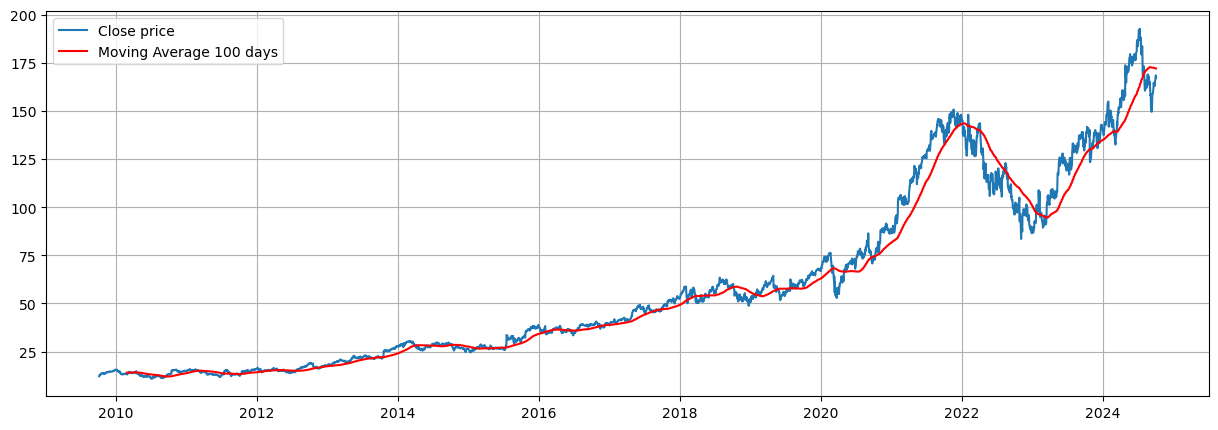

In [10]:
plt.figure(figsize = (15,5))
plt.plot(df.Close, label='Close price')
plt.plot(ma100,'r', label= 'Moving Average 100 days')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
ma200 = df.Close.rolling(200).mean()

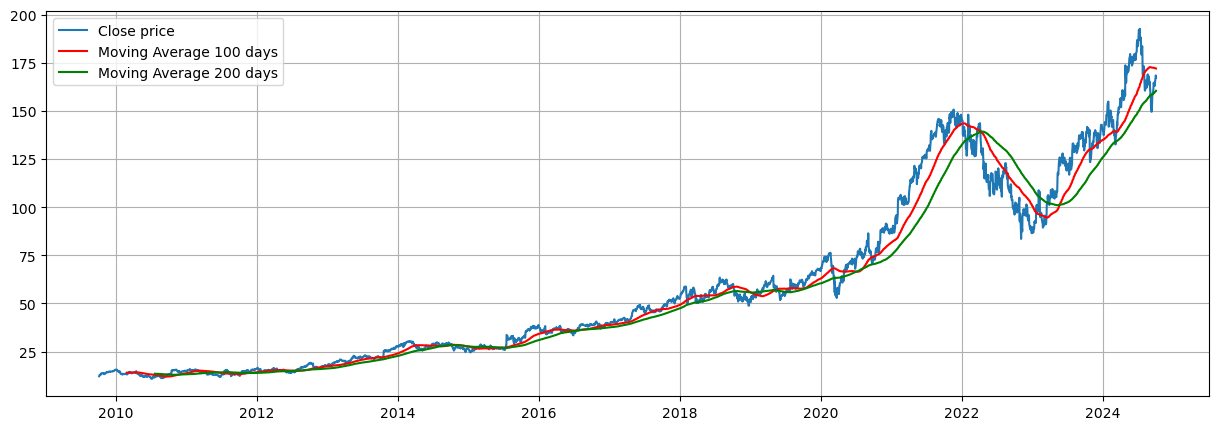

In [12]:
plt.figure(figsize = (15,5))
plt.plot(df.Close, label='Close price')
plt.plot(ma100,'r', label= 'Moving Average 100 days')
plt.plot(ma200,'g', label= 'Moving Average 200 days')
plt.legend()
plt.grid(True)
plt.show()

# Scale Data

In [13]:
Close_price = df['Close']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


scaled_data = scaler.fit_transform(Close_price.values.reshape(-1,1))
scaled_data

array([[0.0071857 ],
       [0.00858586],
       [0.01116147],
       ...,
       [0.85990018],
       [0.86666588],
       [0.86056023]])

In [15]:
len(scaled_data)

3774

In [16]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data) , np.array(y_data)

In [17]:
x_data[0], y_data[0]

(array([[0.0071857 ],
        [0.00858586],
        [0.01116147],
        [0.01070115],
        [0.01098474],
        [0.01205198],
        [0.01233557],
        [0.01359735],
        [0.01285618],
        [0.01558797],
        [0.01589486],
        [0.01584417],
        [0.01575923],
        [0.01616886],
        [0.01611406],
        [0.0161853 ],
        [0.01537426],
        [0.01427962],
        [0.01575238],
        [0.01370695],
        [0.01341514],
        [0.01386724],
        [0.01428373],
        [0.01542357],
        [0.01575923],
        [0.01732241],
        [0.01790466],
        [0.01842527],
        [0.018054  ],
        [0.0186294 ],
        [0.01920891],
        [0.01937469],
        [0.0192596 ],
        [0.01875818],
        [0.01834307],
        [0.02004051],
        [0.02014189],
        [0.02050494],
        [0.01968568],
        [0.02012956],
        [0.02107076],
        [0.02074743],
        [0.02050494],
        [0.02040493],
        [0.02057481],
        [0

# Splitting data

In [18]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2571, 100, 1)
(2571, 1)
(1103, 100, 1)
(1103, 1)


In [20]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 128, return_sequences =True, input_shape = (x_train.shape[1], 1 )))
model.add(LSTM(units = 64, return_sequences =False))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - loss: 0.0026
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 5.7060e-05
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 5.1028e-05
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 5.5742e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 5.3302e-05
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 5.4785e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 4.3000e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 4.2205e-05
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 4.9577e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 4.6737e-05


# Predictions

In [24]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [25]:
predictions

array([[0.3166996],
       [0.3169196],
       [0.3172642],
       ...,
       [0.8099813],
       [0.8136773],
       [0.8178574]], dtype=float32)

In [26]:
y_test

array([[0.31792513],
       [0.32088169],
       [0.31800626],
       ...,
       [0.85990018],
       [0.86666588],
       [0.86056023]])

In [27]:
# reshape y_predicted to have 2D
predictions = predictions.reshape(-1,1)
y_test = y_test.reshape(-1, 1)

In [28]:
# need to scale up to understand the predictions and y_test
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 68.4367  ],
       [ 68.47669 ],
       [ 68.539345],
       ...,
       [158.11479 ],
       [158.78673 ],
       [159.54666 ]], dtype=float32)

In [29]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 68.65950012],
       [ 69.1969986 ],
       [ 68.67424774],
       ...,
       [167.19000244],
       [168.41999817],
       [167.30999756]])

In [30]:
inv_predictions.shape


(1103, 1)

In [31]:
inv_y_test.shape

(1103, 1)

In [32]:
# calculate RMSE performance metrics
rmse = np.sqrt(np.mean(inv_predictions[:len(inv_y_test)] - inv_y_test)**2)
rmse

3.1472397888128256

In [33]:
ploting_data = pd.DataFrame(
    {
      "Date": df.index[splitting_len+100:],
     "Actual": inv_y_test.reshape(-1),
     "Predicted":inv_predictions.reshape(-1)[:len(inv_y_test)]
    }
)
ploting_data

,Date,Actual,Predicted
0,2020-05-15,68.659500,68.436699
1,2020-05-18,69.196999,68.476692
2,2020-05-19,68.674248,68.539345
3,2020-05-20,70.335999,68.567108
4,2020-05-21,70.139999,68.715469
...,...,...,...
1098,2024-09-26,163.830002,156.853027
1099,2024-09-27,165.289993,157.515137
1100,2024-09-30,167.190002,158.114792
1101,2024-10-01,168.419998,158.786728


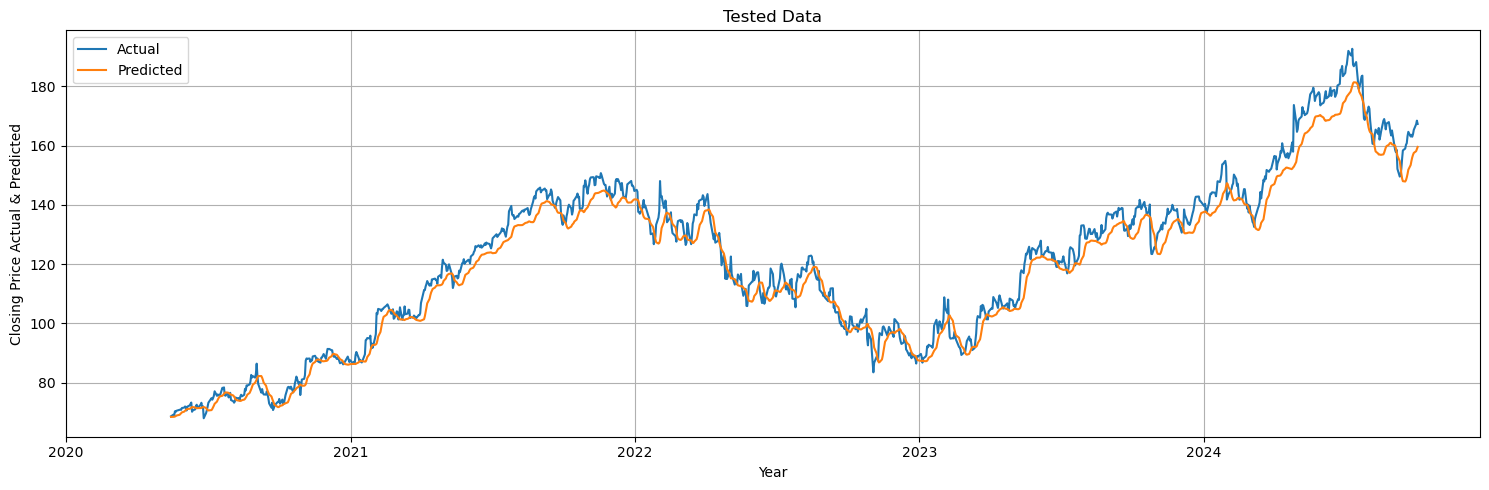

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

ploting_data['Date'] = pd.to_datetime(ploting_data['Date'])
unique_years = ploting_data['Date'].dt.year.unique()


plt.figure(figsize=(15, 5))
plt.plot(ploting_data['Date'], ploting_data['Actual'], label='Actual')
plt.plot(ploting_data['Date'], ploting_data['Predicted'], label='Predicted')
plt.xlabel("Year")
plt.ylabel("Closing Price Actual & Predicted")
plt.title("Tested Data")
plt.xticks(ticks=pd.to_datetime(unique_years.astype(str)), labels=unique_years)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Prediction For The Next 10 Days

In [36]:
# Get the last 100 days closing price
last_100_days = scaled_data[-100:]

# Reshape to fit the model
last_100_days = last_100_days.reshape(1, 100, 1)

# Make the prediction for the next 30 days
prediction_10_days = []
for i in range(10):
  next_day_pred = model.predict(last_100_days)
  prediction_10_days.append(next_day_pred)
  last_100_days = np.append(last_100_days[:,1:,:], next_day_pred.reshape(1,1,1), axis=1) # last_100_days[:,1:,:] This selects all data from last_100_days except for the first day.

# Inverse scaling to get the actual price
prediction_10_days = np.array(prediction_10_days)
prediction_10_days = prediction_10_days.reshape(-1, 1)
prediction_10_days = scaler.inverse_transform(prediction_10_days)

# Create a date range for the next 30 days
last_date = df.index[-1]
next_10_days = pd.date_range(last_date + pd.DateOffset(days=1), periods=10)

# Create a DataFrame for plotting
plotting_data_10 = pd.DataFrame({
    "Date": next_10_days,
    "Predicted": prediction_10_days.reshape(-1)
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


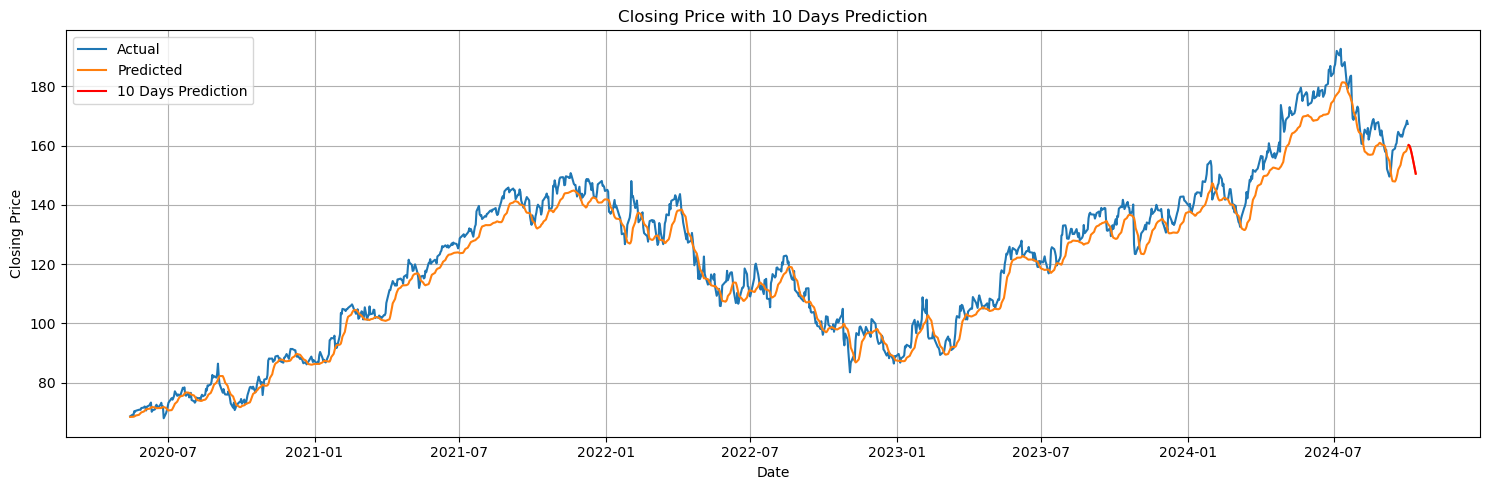

In [37]:
# Concatenate the two DataFrames
plotting_data_all = pd.concat([ploting_data, plotting_data_10])

# Convert 'Date' column to datetime
plotting_data_all['Date'] = pd.to_datetime(plotting_data_all['Date'])

# Plotting the combined data
plt.figure(figsize=(15, 5))

# Plotting 'Actual' from ploting_data
plt.plot(ploting_data['Date'], ploting_data['Actual'], label='Actual')

# Plotting 'Predicted' from both DataFrames
plt.plot(plotting_data_all['Date'], plotting_data_all['Predicted'], label='Predicted')

# Plotting the 10 days prediction with a different color
plt.plot(plotting_data_10['Date'], plotting_data_10['Predicted'], label='10 Days Prediction', color='red')


plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price with 10 Days Prediction")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

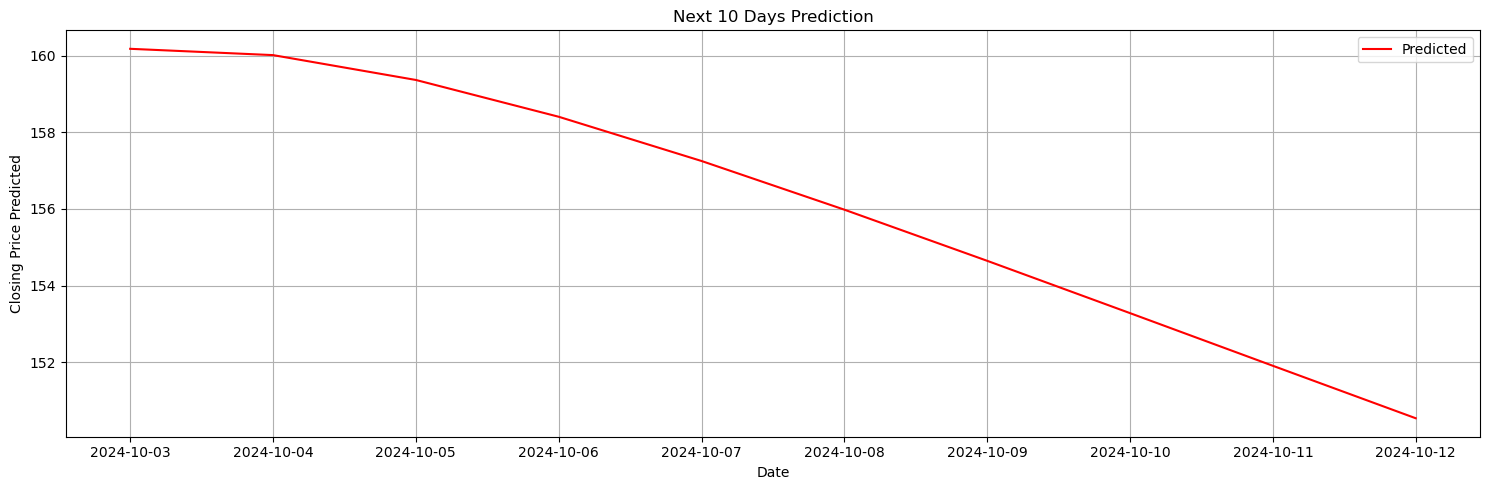

In [38]:
# Plotting the prediction for the next 10 days
plt.figure(figsize=(15, 5))
plt.plot(plotting_data_10['Date'], plotting_data_10['Predicted'], label='Predicted',color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price Predicted")
plt.title("Next 10 Days Prediction")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [39]:
model.save("stock_future_prediction_saved.keras")